<a href="https://colab.research.google.com/github/IbrahimEssakine/neural-network-TDI/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find or create a labeled dataset to our neural network.

In [ ]:
# STEP 1.1

!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

fatal: destination path 'python-mnist' already exists and is not an empty directory.
data directory already present, exiting
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Imported the EMNIST libraries we need!


## *Splititng* our dataset into a **training set** and a **testing set**

# the training set  is used to train the neural network 

# and  the testing set is data that's kept  hidden from the neural network during  training so it can be used to check the  network's accuracy.

In [ ]:
# STEP 1.2

# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# redimensionner
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


## this line lets us display  an image and we'll also display the  label using the print command



Image Label: j


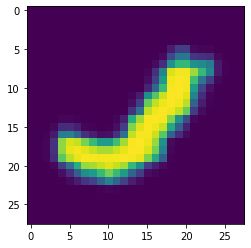

In [ ]:
# STEP 1.3

import matplotlib.pyplot as plt

img_index = 24 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

# Now WE done with the first step .

# step 2 : now that we have our dataset ,we need to build a neurons network.

# there are already libraries in python that we  can use to make the network,

# we're going  to use a library called **sklearn**  we have access to it,

# sklearn includes  a bunch of different machine learning  algorithms and we'll be using its multi-layer perception algorithm in this  lab.

In [ ]:
# STEP 2.1

# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network") 

Created our first MLP network


## step 3  next we want to train our  network over those 20 epochs and see how  well it guesses the letters in the  training and testing data sets with this  one line of code .

## for every  epoch our program prints a number called  the error of the loss function ,

# this  basically represents how wrong the  network was 

# overall we want to see this  number going down with each epoch 

# the  number that we really care about is how  well the network does on the testing  data set which shows how good our  network is at dealing with data that has never seen before .

In [ ]:
# STEP 3.1

mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.886500
Test set score: 0.840800


### To see where the network made  most of its mistakes we can create a  confusion matrix.

## the color of each cell in the  confusion matrix represents the number  of elements in that cell

# and a brighter  color means more elements the rows are  the correct values , and the columns are  the predicted values ,  and the numbers on  the axis represent the 26 letters in the  alphabet,  so 0 is a and one is b etc etc ,

# so cell 0 0 represents the number of  times the network correctly predicted  that an a is an a 

# it's good to see a bright diagonal line  because those are all the correct values  , but other bright cells are mislabeled so  we should check if there are any  patterns 

## for example i and l may be easy  to confuse our **neural network**

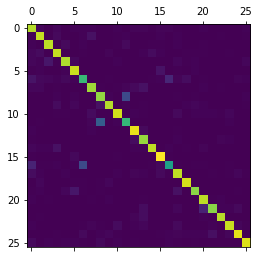

In [ ]:
# STEP 3.2

# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

## we should check if there are any  patterns for example i and l may be easy  to confuse so let's look at some cases  where that happened 

There were 84 times that the letter i was predicted to be the letter l.


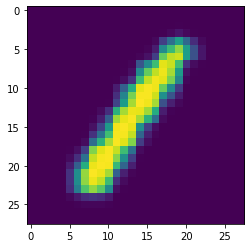

In [ ]:
# STEP 3.3

# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 1 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

To see if we can improve our  accuracy we can program a slightly  different neural 

we can play around with the  structure here to see what happens :  now let's try creating a neural network  that has 5 hidden layers of 100 neurons  each and we'll train it over 50 epochs.

In [ ]:
# STEP 3.4

# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25788282
Iteration 13, loss = 0.24536935
Iteration 14, loss = 0.23723836
Iteration 15, loss = 0.23099846
Iteration 16, loss = 0.22170512
Iteration 17, loss = 0.22529625
Iteration 18, loss = 0.21631371
Iteration 19, loss = 0.21638970
Iteration 20, loss = 0.21005670
Iteration 21, loss = 0.21102943
Iteration 22, loss = 0.20452900
Iteration 23, loss = 0.20898563
Iteration 24, loss = 0.20109377
Iteration 25, loss = 0.19006968
Iteration 26, loss = 0.19761229
Iteration 27, loss = 0.19347616
Iteration 28, loss = 0.19347809
Iteration 29, loss = 0.20051092
Iteration 30, loss = 0.18964287
Iteration 31, loss = 0.18354442
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.942133
Test set score: 0.885300


NOW we test this 

i have made up already an example 
where i stored a sentence in my GitHub Repository

which i wrote each letter on a paper and scanne it resize it and finally design it so the neural netwok will understand it

In [ ]:
# STEP 4.1

# Pulls the scanned data set from GitHub
!git clone https://github.com/IbrahimEssakine/neural-network-TDI.git
!git pull
!ls neural-network-TDI/letters-mod
!cd /content/neural-network-TDI/letters-mod
!pwd

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("/content/neural-network-TDI/letters-mod/"))
files.sort()

fatal: destination path 'neural-network-TDI' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
00.jpg	01.jpg	02.png
/content


Imported the scanned images.


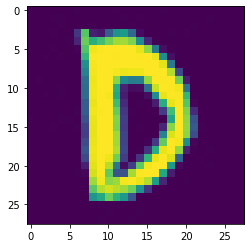

In [ ]:
# STEP 4.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/content/neural-network-TDI/letters-mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[1])  #<--- Change this index to see different letters


In [ ]:
# STEP 4.3

# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tdl


In [ ]:
# STEP 4.4

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tdl


Processed the scanned images.


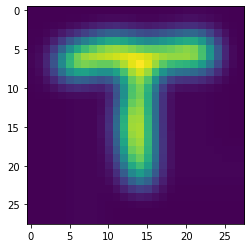

In [ ]:
# STEP 4.5

# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[0]) #<<< change this index if you want to see a different letter from the story

In [ ]:
# STEP 4.6

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tdb
